This is the Exploratory Data Analysis (EDA) of the Capstone 2 project. In this analysis we will plot the distribution of numerical columns, and then have a look on the columns with object values.  

Content:

1. Brief view on the data;
2. Split data and exploratory analysis on training data
3. Comparing a few simple models

# 1. Brief view on the data

First let's import all necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data to the data frame.
data_lc = pd.read_csv('lending_club_data.csv')

In [3]:
# Have a look on the first few rows.
data_lc.head().T

,0,1,2,3,4
loan_amnt,3600.0,24700.0,20000.0,10400.0,11950.0
term,36 months,36 months,60 months,60 months,36 months
int_rate,13.99,11.99,10.78,22.45,13.44
grade,C,C,B,F,C
emp_length,10+ years,10+ years,10+ years,3 years,4 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000.0,65000.0,63000.0,104433.0,34000.0
loan_status,1,1,1,1,1
purpose,debt_consolidation,small_business,home_improvement,major_purchase,debt_consolidation
dti,5.91,16.06,10.78,25.37,10.2


In [4]:
# check the column names, type, and value counts.
data_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188398 entries, 0 to 1188397
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              1188398 non-null  float64
 1   term                   1188398 non-null  object 
 2   int_rate               1188398 non-null  float64
 3   grade                  1188398 non-null  object 
 4   emp_length             1188398 non-null  object 
 5   home_ownership         1188398 non-null  object 
 6   annual_inc             1188398 non-null  float64
 7   loan_status            1188398 non-null  int64  
 8   purpose                1188398 non-null  object 
 9   dti                    1188398 non-null  float64
 10  fico_range_high        1188398 non-null  float64
 11  inq_last_6mths         1188398 non-null  float64
 12  revol_util             1188398 non-null  float64
 13  initial_list_status    1188398 non-null  object 
 14  total_rec_late_fee

Description of all columns are as below:
acc_open_past_24mths
        Number of trades opened in past 24 months.
annual_inc
        The self-reported annual income provided by the borrower during registration.
application_type
        Indicates whether the loan is an individual application or a joint application with two co-borrowers
dti
        A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line
        The date the borrower's earliest reported credit line was opened
emp_length
        Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
fico_range_high	
        The upper boundary range the borrower’s FICO at loan origination belongs to.
grade	
        LC assigned loan grade
home_ownership	
        The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
initial_list_status	
        The initial listing status of the loan. Possible values are – W, F
inq_last_6mths	
        The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
int_rate	
        Interest Rate on the loan
mort_acc	
	    Number of mortgage accounts.
num_tl_op_past_12m	
	    Number of accounts opened in past 12 months
percent_bc_g75	
	    Percentage of all bankcard accounts > 75% of limit.
purpose	
	    A category provided by the borrower for the loan request. 
revol_util	
	    Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
term	
	    The number of payments on the loan. Values are in months and can be either 36 or 60.
tot_hi_cred_lim	
	    Total high credit/credit limit
total_bc_limit	
	    Total bankcard high credit/credit limit
loan_amnt	
	    The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status	
	    Current status of the loan
debt_settlement_flag   	
	    Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.
disbursement_method	
	    The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY
last_fico_range_low	
	    The lower boundary range the borrower’s last FICO pulled belongs to
last_pymnt_amnt        	
	    Last total payment amount received
recoveries	
	    post charge off gross recovery
total_rec_late_fee     	
	    Late fees received to date

In [5]:
# column 'loan-status' is our target column. Let's count its values.
data_lc['loan_status'].value_counts()

1    953498
0    234900
Name: loan_status, dtype: int64

loan_status = 1 means the loan is fully paid, and loan_status = 0 means the loan is defaulted.
Next we want to check the distribution of numerical columns. We will plot histogram on them.  

In [6]:
data_lc.astype({'loan_status': 'category'}).dtypes

loan_amnt                 float64
term                       object
int_rate                  float64
grade                      object
emp_length                 object
home_ownership             object
annual_inc                float64
loan_status              category
purpose                    object
dti                       float64
fico_range_high           float64
inq_last_6mths            float64
revol_util                float64
initial_list_status        object
total_rec_late_fee        float64
recoveries                float64
last_pymnt_amnt           float64
last_fico_range_low       float64
application_type           object
acc_open_past_24mths      float64
mort_acc                  float64
num_tl_op_past_12m        float64
percent_bc_gt_75          float64
tot_hi_cred_lim           float64
total_bc_limit            float64
disbursement_method        object
debt_settlement_flag       object
earliest_cr_line_year       int64
dtype: object

In [7]:
columns_dtype_float = data_lc.select_dtypes(['float','int64']).columns

In [8]:
type(columns_dtype_float)

pandas.core.indexes.base.Index

In [9]:
columns_dtype_float

Index(['loan_amnt', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'fico_range_high', 'inq_last_6mths', 'revol_util', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_low',
       'acc_open_past_24mths', 'mort_acc', 'num_tl_op_past_12m',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bc_limit',
       'earliest_cr_line_year'],
      dtype='object')

In [10]:
# check how many numerical columns.
columns_dtype_float.size

19

In [11]:
# define a function to make histogram plots.
def histplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.hist(data_lc[col])
        ax.set(xlabel=col, ylabel='count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

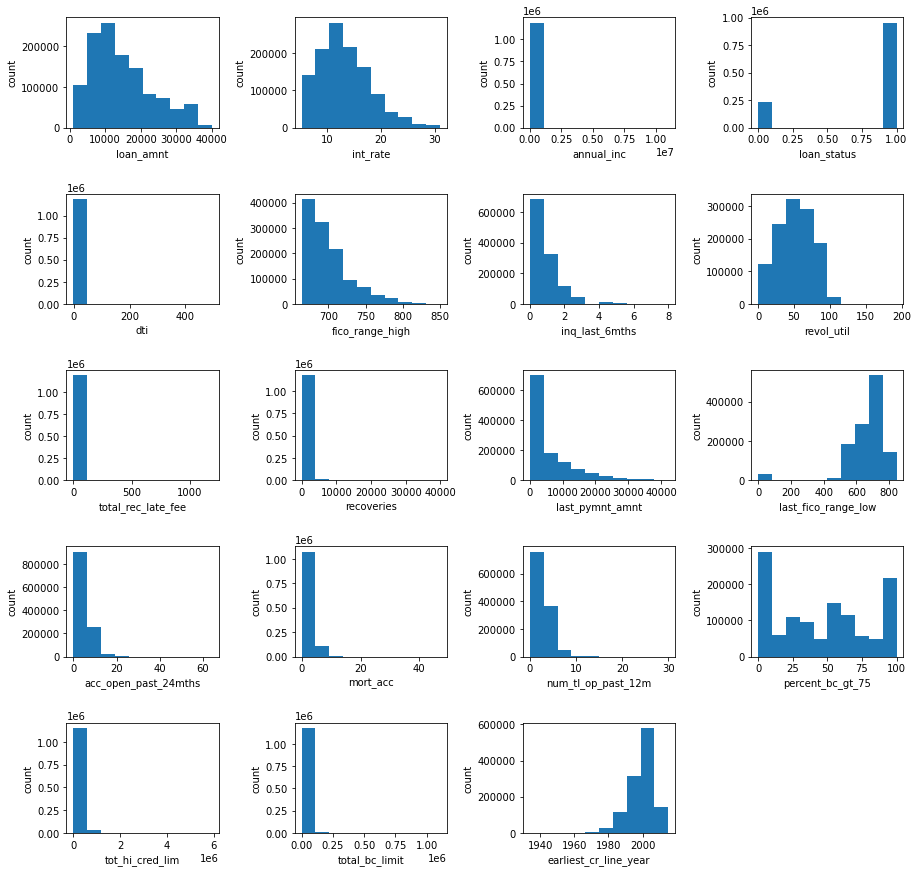

In [12]:
# run the function.
histplots(columns_dtype_float, ncol=4, figsize=(15,15))

In [13]:
# there are a few columns with long tail on the right side. We would like to use log y-axis to see the distribution more clearly.
columns_log = ['annual_inc', 'dti', 'total_rec_late_fee', 'recoveries', 'acc_open_past_24mths', 'mort_acc', 'tot_hi_cred_lim', 'total_bc_limit']

In [14]:
# Define the histogram plots with log y-axis
def histplots_log(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.4, hspace=0.5)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.set_yscale('log')
        ax.hist(data_lc[col])
        ax.set(xlabel=col, ylabel='count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

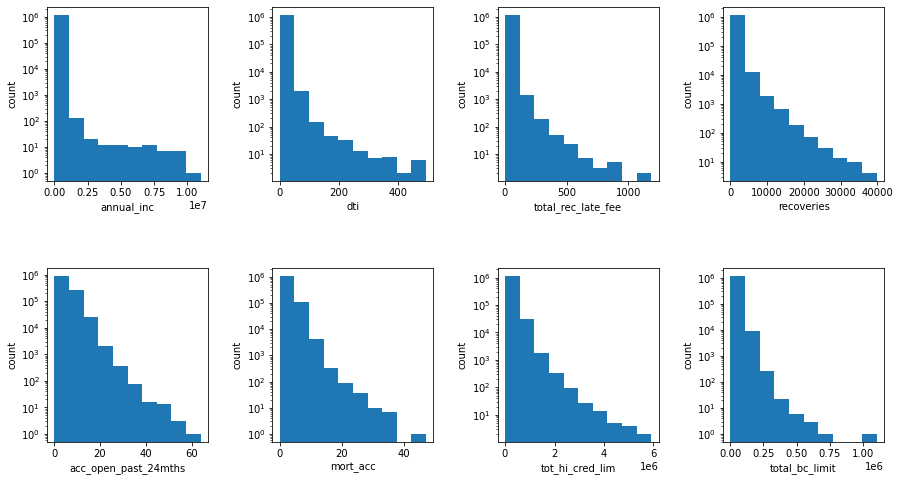

In [15]:
# Run the function to create the plots.
histplots_log(columns_log, ncol=4, figsize = (15, 8))

All numerical columns looks fine. Now let's move to the columns with object values. 

In [16]:
columns_dtype_object = data_lc.select_dtypes('object').columns
print(columns_dtype_object)

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'initial_list_status', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


## 2. Split data and exploratory analysis on training data

First let's split data into training data and testing data. We will study the training data to see the value
distribution in each object column, under the two different loan status. Then we will use the training data 
and create a few simple modelings to predict the y value (loan status) for the testing data. We will compare 
the predicted values with the testing values. The accuracy rate is calculated for each model.

In [17]:
data_shuffled = data_lc.sample(len(data_lc))

In [18]:
data_shuffled.reset_index(drop=True, inplace=True)

In [19]:
training = data_shuffled.iloc[:len(data_lc)//2]
testing = data_shuffled.iloc[len(data_lc)//2:]

In [20]:
training.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,...,application_type,acc_open_past_24mths,mort_acc,num_tl_op_past_12m,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,disbursement_method,debt_settlement_flag,earliest_cr_line_year
0,32000.0,36 months,9.49,B,10+ years,MORTGAGE,108000.00,1,debt_consolidation,18.16,...,Individual,5.0,7.0,2.0,100.0,497857.0,19000.0,Cash,N,2003
1,23325.0,60 months,15.31,C,10+ years,RENT,52275.17,1,debt_consolidation,26.63,...,Individual,4.0,1.0,1.0,100.0,71219.0,4000.0,Cash,N,1993
2,29725.0,36 months,19.52,E,8 years,RENT,78500.00,0,debt_consolidation,27.40,...,Individual,1.0,0.0,1.0,75.0,120800.0,43800.0,Cash,Y,1991
3,15000.0,36 months,11.53,B,9 years,RENT,52000.00,1,credit_card,25.52,...,Individual,3.0,0.0,1.0,83.3,63485.0,30700.0,Cash,N,2004
4,5400.0,36 months,9.99,B,10+ years,MORTGAGE,60000.00,1,home_improvement,22.22,...,Individual,2.0,1.0,0.0,100.0,69881.0,3500.0,Cash,N,1999


In [21]:
testing.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,...,application_type,acc_open_past_24mths,mort_acc,num_tl_op_past_12m,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,disbursement_method,debt_settlement_flag,earliest_cr_line_year
594199,12000.0,36 months,12.49,B,3 years,MORTGAGE,160000.0,1,credit_card,25.29,...,Individual,9.0,0.0,4.0,100.0,282546.0,1100.0,Cash,N,2002
594200,9950.0,36 months,13.68,C,< 1 year,RENT,30000.0,1,debt_consolidation,6.64,...,Individual,2.0,0.0,2.0,75.0,29500.0,27000.0,Cash,N,2006
594201,5125.0,36 months,10.99,B,10+ years,OWN,39500.0,1,vacation,9.27,...,Individual,3.0,1.0,1.0,0.0,29400.0,22900.0,Cash,N,1999
594202,17000.0,36 months,8.19,A,4 years,MORTGAGE,65000.0,1,credit_card,17.93,...,Individual,4.0,3.0,2.0,50.0,208229.0,40500.0,Cash,N,1994
594203,15000.0,36 months,12.79,C,9 years,MORTGAGE,125000.0,0,debt_consolidation,13.15,...,Individual,7.0,2.0,4.0,40.0,279798.0,17700.0,Cash,N,2005


In [22]:
# Here is what we plan to do: We will first group the training data by column "loan_status" and 
# count the values for each column. Then, for this column, we will calculate the percentage of 
# numbers of  each value in total number of all values, under the condition of loan_status = 0; 
# Next step we will do the same for loan_status = 1. Last step is to calculate the percentage 
# difference for each value between loan_status = 0 and loan_status = 1.

for col in columns_dtype_object: # run for loop for each object column
    col_vs_loanstatus = pd.DataFrame(training.groupby(['loan_status'])[col].value_counts())
    col_vs_loanstatus.rename(columns={col: 'counts'}, inplace=True)
    col_vs_loanstatus.reset_index(inplace=True)
# col_vs_loanstatus is the data frame which contains value counts for this column.

# calculate the total counts of this column when loan_status = 0 and = 1 respectively. 
    col_total = [] # this is the list for the total counts.
    col_val_n = int(len(col_vs_loanstatus)/2) # this is the number of unique values in this column.

# run a for loop to calculate the total counts for each case.
    for i in range(col_val_n): 
        col_total.append(col_vs_loanstatus[col_vs_loanstatus['loan_status']==0]['counts'].sum())
    for i in range(col_val_n, len(col_vs_loanstatus)): 
        col_total.append(col_vs_loanstatus[col_vs_loanstatus['loan_status']==1]['counts'].sum())
    
    col_vs_loanstatus['total'] = col_total #create the column 'total'
    
# get the percentage of the numbers of each value in the total numbers when loan_status =0 and =1.  
    col_vs_loanstatus['%'] = 100 * col_vs_loanstatus['counts'] / col_vs_loanstatus['total']

# sort values for a easy compariton.
    col_vs_loanstatus.sort_values(by=['loan_status', col], inplace=True, ignore_index=True)
  
 # calculate the percentage difference between loan_status = 0 and = 1.
    perc_diff = [] # this is the list for the percentage difference.
    for i in range(col_val_n):
        perc_diff.append(col_vs_loanstatus.loc[i]['%'] - col_vs_loanstatus.loc[i+col_val_n]['%'])

# to make sure the list perc_diff has the same length as col_vs_loanstatus, we need to add enough
# zeros to this list. 
    for i in range(col_val_n):
        perc_diff.append(0.0)
        
# some columns have specific values only when loan_status = o or = 1, but not in both. So we need 
# to add extra zero to the list. 
    for i in range(len(col_vs_loanstatus)-len(perc_diff)):
        perc_diff.append(0.0)
    
    
    col_vs_loanstatus['% diff'] = perc_diff
    print(col_vs_loanstatus)
    print('\n')
                          

   loan_status        term  counts   total          %     % diff
0            0   36 months   69655  117412  59.325282 -19.834175
1            0   60 months   47757  117412  40.674718  19.834175
2            1   36 months  377422  476787  79.159457   0.000000
3            1   60 months   99365  476787  20.840543   0.000000


    loan_status grade  counts   total          %     % diff
0             0     A    5818  117412   4.955200 -15.337089
1             0     B   22606  117412  19.253569 -12.385297
2             0     C   37636  117412  32.054645   4.209507
3             0     D   26752  117412  22.784724   9.861133
4             0     E   16042  117412  13.662999   8.397125
5             0     F    6444  117412   5.488366   3.866258
6             0     G    2114  117412   1.800497   1.388364
7             1     A   96751  476787  20.292290   0.000000
8             1     B  150850  476787  31.638866   0.000000
9             1     C  132762  476787  27.845138   0.000000
10           

From the print above we do see 

Now let's see the columns with numerical values. We want to see the correlations between loan status and those columns.
We will use the most correlated columns for a few models.

In [23]:
col_corr = []
data_lc_corr = []
for item in columns_dtype_float:
    data_lc_corr.append(abs(training['loan_status'].corr(training[item])))
    col_corr.append(item)
    
df_corr = pd.DataFrame({'column':col_corr, 'correlation':data_lc_corr})
df_corr.sort_values('correlation')

,column,correlation
2,annual_inc,0.039135
18,earliest_cr_line_year,0.050340
7,revol_util,0.057208
15,percent_bc_gt_75,0.066565
6,inq_last_6mths,0.070049
0,loan_amnt,0.070826
17,total_bc_limit,0.071206
13,mort_acc,0.075256
16,tot_hi_cred_lim,0.076194
14,num_tl_op_past_12m,0.089291


The four largest correlated columns are 'last_fico_range_low', 'recoveries', 'last_pymnt_amnt', and 'int_rate'. We will use them in the simple modeling.

### 3. Comparing a few simple models

Now let's consider a few models. The first one can be the most simplest. We know that there are more 'fully paid' loans than defaulted loans. We will assume that all loans are fully paid. Let's calculate the prediction accuracy in this case.

In [39]:
# Model 1. All loans are fully paid.
accuracy_1 = testing[testing['loan_status']==1]['loan_status'].count() / len(testing['loan_status'])
print ('Prediction Accuracy for model 1 is:', accuracy_1)

Prediction Accuracy for model 1 is: 0.8022749954139943


So if we predict all loans are fully paid, the accuracy is 80%. This gives a bottom line for our future models.

Then let's use the most correlated column, 'last_fico_range_low', with a 0.58 correlation coefficient. Let's first 
calculate the two mean values when loan_status = 0 and = 1. We will then use the average of these two values as
the threshold for our modeling. This is our second model.

In [41]:
mean_1 = training[training['loan_status']==0]['last_fico_range_low'].mean()
mean_2 = training[training['loan_status']==1]['last_fico_range_low'].mean()
mean_threshold = (mean_1 + mean_2) / 2
print('Threshold for column last_fico_range_low is: ', mean_threshold)

Threshold for column last_fico_range_low is:  601.0736002245253


We will use 601 for our second model. If the value of 'last_fico_range_low' is smaller than 601, we will predict
"the loan will default" (loan_status = 0), otherwise we will predict "loan will be fully paid" (loan_status = 1).
Let's calculate the prediction accuracy for this model. 

In [42]:
# model 2
predict_list = []
for index, row in testing.iterrows():
    if (row['last_fico_range_low'] > 600):
        predict = 1
    else:
        predict = 0
        
    if predict == row['loan_status']:
        ls_predict = 1
    else:
        ls_predict = 0
        
    predict_list.append(ls_predict)
    
print('Prediction accuracy for model 2 is:', sum(predict_list)/len(predict_list))

Prediction accuracy for model 2 is: 0.9022314073231359


When we just use one column to predict the value for our testing data, we see the accuracy is 90%. That is great improvement comparing our first model. We can also say that the prediction is not too bad when just using one 
single column. We will see if we get good improvement if we use more columns.

For our third model, we use four columns 'last_fico_range_low', 'recoveries', 'last_pymnt_amnt', and 'int_rate'.
Just like the single column 'last_fico_range_low', We will use the average of the two means as the threshold.

In [24]:
col_for_modeling = ['last_fico_range_low', 'recoveries', 'last_pymnt_amnt', 'int_rate']

In [25]:
for col in col_for_modeling:
    print(col)
    col_mean_default = training[training['loan_status']==0][col].mean()
    col_mean_fullypaid = training[training['loan_status']==1][col].mean()
    col_threshold = (col_mean_default + col_mean_fullypaid) / 2
    print('mean for default:', col_mean_default, '. mean for fully paid:', col_mean_fullypaid,  '. threshold:', col_threshold)
    print('\n')

last_fico_range_low
mean for default: 503.64298368139544 . mean for fully paid: 698.5042167676552 . threshold: 601.0736002245253


recoveries
mean for default: 1265.7312250025632 . mean for fully paid: 0.0 . threshold: 632.8656125012816


last_pymnt_amnt
mean for default: 487.4783500834502 . mean for fully paid: 6948.386625304682 . threshold: 3717.932487694066


int_rate
mean for default: 15.799039961842107 . mean for fully paid: 12.626898405407411 . threshold: 14.21296918362476




In [26]:
# define a function to calculate the value_p. value_p is the probability difference between loan_status = 0
# and loan_status = 1. If value_p > 0, it means the probability of loan_status = 0 is greater than loan_status = 1.
# We calculate it in this way: If the mean in the case loan_status = 0 is greater than the mean when loan_status 
# = 1, then greater = True. We know that the value_p will be smaller if the value for this column is smaller. 
# "constant" is the weight for the probability. Since we use for columns, each column will have the weight of 0.25.

def value_p(value, threshold, constant, greater=True):
    if (greater):
        value_p = constant * (value - threshold) / threshold
    else:
        value_p = constant * (threshold - value) / threshold
        
    return value_p

In [43]:
# we will use this model to predict each row in the testing data.

indicator_list =[]
count = 0
total_count = 0

# let's iterate every row in the testing data.
for index, row in testing.iterrows():
    value1 = row['last_fico_range_low']
    value2 = row['recoveries']
    value3 = row['last_pymnt_amnt']
    value4 = row['int_rate']
   
 # let's call the value_p function to calculate the probability difference.
    
    p_last_fico_range_low = value_p(value1, 601, 0.25, greater=False)
    p_recoveries = value_p(value2, 633, 1/4, greater=True)
    p_last_pymnt_amnt = value_p(value3, 3718, 1/4, greater=False)
    p_int_rate = value_p(value4, 14.2, 1/4, greater=True)
    
# let's sum them to see the overall probability difference.

    p_total = p_last_fico_range_low + p_recoveries + p_last_pymnt_amnt + p_int_rate
    if p_total > 0:
        predicted = 0
    else:
        predicted = 1
    
# 'indicator' is used to count the prediction result. If it is 1, it means 'the prediction is correct'.
    if predicted==row['loan_status']:
        indicator = 1
    else:
        indicator = 0
        if predicted==0:
            count = count + 1
        total_count = total_count + 1
        
# 'count' and 'total_count' is used to answer this question: if the prediction is failed, then in this case
# how many rows are under loan_status = 1?
        
    indicator_list.append(indicator)

In [45]:
print('Prediction accuracy for model 3 is:', sum(indicator_list)/len(indicator_list))

Prediction accuracy for model 3 is: 0.9358009690356262


The result shows that for the third model, the prediction accuracy is 93.5%. That's already a good improvement comparing
with our single column model. 

In [46]:
print(count, total_count)

19341 38147


It shows that in those failed predictions, there are about half of them are under loan_status = 1 (fully paid). Remember
that in all loans, about 80% are fully paid. It means that for this model, more failed prediction are on those fully paid loans than defaulted loans. 

Conclusion: In this study we used three different models to predict the loan status. The result shows that if we use four most correlated columns for the prediction, the accuracy is about 94%. For this model, we did not use columns with object values. Since we did see that in some object columns, the number of some values in one loan status is more than that in the other status, which indicate a impact on the prediction. In the further study we will use existing models for classification and compare the obtained accuracy with the accuracy in this study. 